# Python Hackathon Q&A

In [20]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date
import warnings

warnings.filterwarnings("ignore")

## Reading the datasets

In [21]:
Patients = pd.read_excel("HospitalDatabase .xlsx", "Patients")

In [22]:
EDVisits = pd.read_excel("HospitalDatabase .xlsx", "EDVisits")

In [23]:
AmbulatoryVisits = pd.read_excel("HospitalDatabase .xlsx", "AmbulatoryVisits")

In [24]:
ReAdmissionRegistry = pd.read_excel("HospitalDatabase .xlsx", "ReAdmissionRegistry")

In [25]:
Discharges = pd.read_excel("HospitalDatabase .xlsx", "Discharges")
Discharges 

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality
0,1,9,2018-01-01,2018-01-07 18:06:06.407668,Expired,Cardiology,AMI,9.646857,0.061540
1,257,93,2018-01-06,2018-01-18 02:59:04.667389,Expired,Cardiology,Broken Leg,6.816558,0.628827
2,152,101,2018-01-07,2018-01-11 16:16:06.782009,Expired,Cardiology,Kidney Failure,6.580273,0.573887
3,361,102,2018-01-07,2018-01-15 04:48:33.133666,Expired,Cardiology,Afib,12.794536,0.222163
4,258,103,2018-01-07,2018-01-15 13:32:36.156712,Expired,Cardiology,Broken Leg,2.639297,0.055468
...,...,...,...,...,...,...,...,...,...
715,715,716,2018-02-21,2018-03-06 03:31:05.261763,Transfer,ICU,Heart Failure,11.362095,0.370695
716,698,723,2018-02-22,2018-02-26 15:09:02.584388,Transfer,ICU,Heart Failure,10.262312,0.812930
717,704,724,2018-02-22,2018-02-27 07:59:32.385361,Transfer,General Medicine,Pneumonia,6.036234,0.094128
718,716,733,2018-02-22,2018-03-05 12:31:55.957890,Transfer,ICU,Heart Failure,13.323413,0.490892


In [26]:
Providers = pd.read_excel("HospitalDatabase .xlsx", "Providers")

In [27]:
EDUnique = pd.read_excel("HospitalDatabase .xlsx", "EDUnique")


### 1.Make a pair plot on Readmission Registry table & do u see any correlation between columns values.

<Figure size 720x432 with 0 Axes>

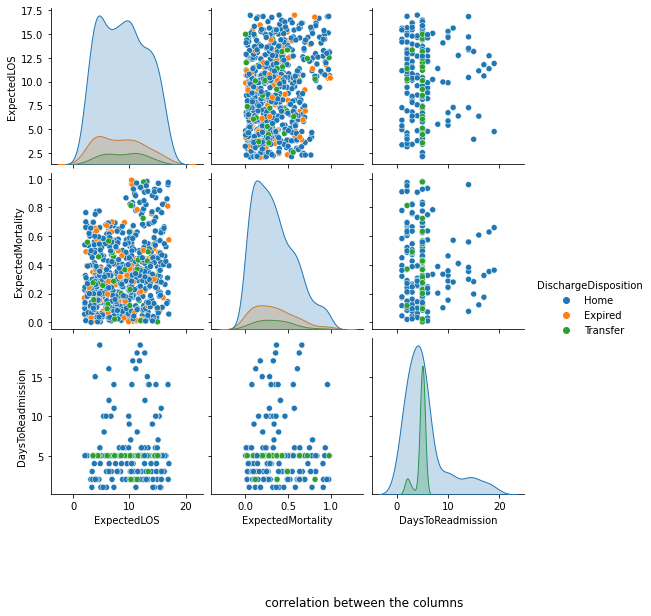

In [28]:
plt.figure(figsize=(10,6))
sns.pairplot(ReAdmissionRegistry, vars=['ExpectedLOS', 'ExpectedMortality', 'DaysToReadmission'],hue='DischargeDisposition')
plt.title('correlation between the columns',y=-0.75,x=-0.05)
plt.show()

Based on the pair plot on DischargeReadmission sheet could not find any columns highly correlated.Expected Morality and Expected Los are slightly corelated.

### 2.Using iloc, retrieve the firstname and lastname of patients between indices 101 and 200.


In [29]:
Patients.iloc[101:201,[1,2]]

,FirstName,LastName
101,Gipsy,Frankton
102,Jethro,Wharin
103,Viv,Aylward
104,Swift,Dreschler
105,Fadel,Jacquemard
...,...,...
196,Noam,Laguerre
197,Arie,Bayless
198,Janaye,O'Mohun
199,Fonz,Group


### 3.Create a figure object called fig using plt.figure() **
 ** Use add_axes to add an axis to the figure canvas at [0,0,1,1]. Call this new axis ax. **
 ** Plot (x,y) on that axes and set the labels.
 Note : You can plot on any x,y set of values.

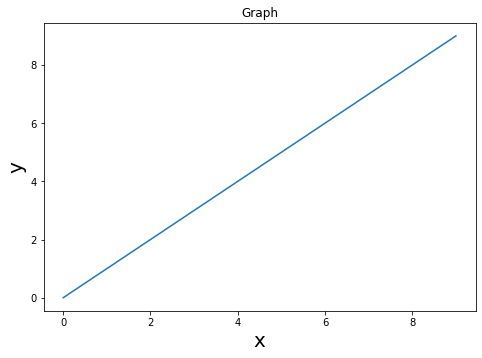

In [30]:
x = range(0, 10)
y = range(0, 10)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(x,y)
ax.set_xlabel("x",fontsize=20)
ax.set_ylabel("y",fontsize=20)
ax.set_title("Graph")
plt.show()   

### 4.Display data by splitting age in 4 quartiles and labeling the quartiles.

In [38]:
Patients['Converted_dob']=Patients['DateOfBirth'].dt.strftime("%d/%m/%Y")
def age(born):
    born = datetime.strptime(born, "%d/%m/%Y").date()
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))
Patients['Age'] = Patients['Converted_dob'].apply(age)
Quartile_Age =Patients['Age'].quantile([ 0.25,  0.5, 0.75,1])
index_Label = (['1st Quantile','2nd Quantile','3rd Quantile','4th Quantile']) 
Quartile_Age.index =index_Label
Quartile_Age

1st Quantile    42.0
2nd Quantile    48.0
3rd Quantile    56.0
4th Quantile    62.0
Name: Age, dtype: float64

### 5.Display full name of patients who are born in 1986

In [32]:
data_1986 = Patients[pd.DatetimeIndex(Patients.DateOfBirth).year==1986]
data_1986['FullName']=data_1986['FirstName']+ '' + data_1986['LastName']
data_1986['FullName']


23         Gabriel Joseph
24         Lincoln Brenda
29             AlaHalpert
72            LolitaDarci
164         FadelBernardt
238         BentleyKippax
367            ValeOlanda
373          BrittDureden
386       CristabelChatel
415       ConstantiaGroup
452       MorganScrowston
561             DomBaglow
568        IgnazioMelling
595         HomenickRings
639           HashimSlark
643       EllieRamsbotham
674        LlewellynGroup
714             NilesShaw
733             YvetteInc
777          SiouxieGroup
852            CarlyGroup
868        WorthPickering
877           ArniBaldack
909       KuvalisCoupland
922    RebbeccaRollingson
940            WatFideler
Name: FullName, dtype: object

### 6.Create a jointplot on expected mortality & expected length of stay.

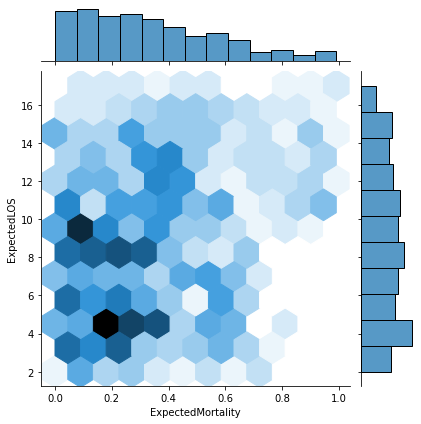

In [33]:
sns.jointplot(x='ExpectedMortality' ,y ='ExpectedLOS' ,data=Discharges, kind='hex')
plt.show()

### 7.Create a pair plot on whole dataframe by taking parameter "hue" as EDDisposition.

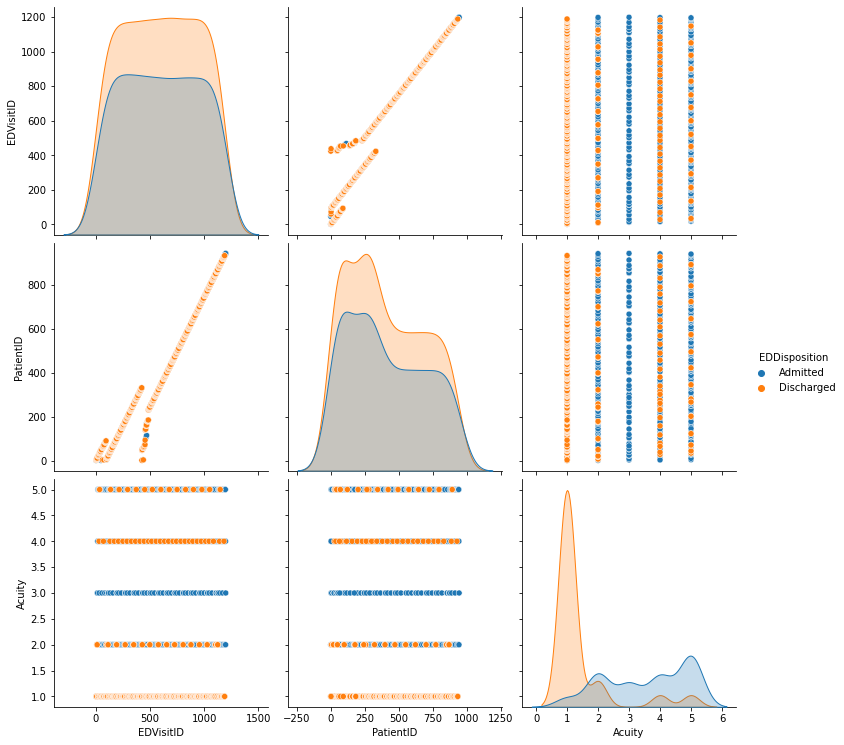

In [34]:
sns.pairplot(EDVisits, hue='EDDisposition',height=3.5)

### 8.Create a bar chart between expectedLOS & Primary diagnosis.

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

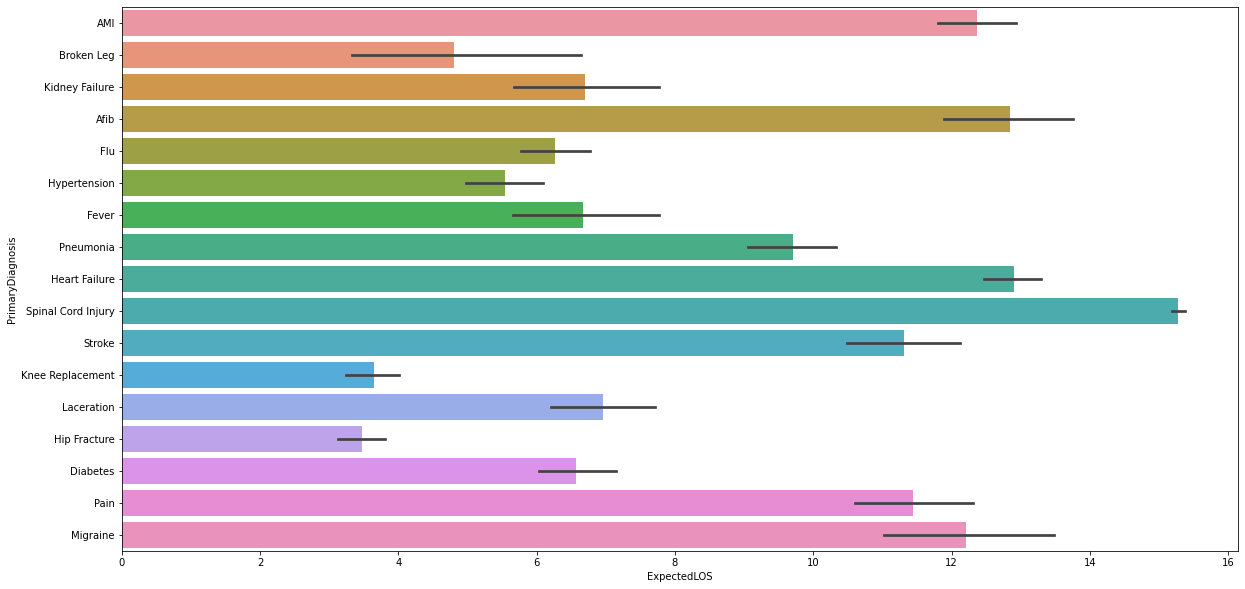

In [35]:
plt.figure(figsize=(20,10))
ax=sns.barplot(x='ExpectedLOS' ,y ='PrimaryDiagnosis' ,data=Discharges)
ax.bar_label(ax.containers[0], label_type='center')
#plt.title('bar chart between expectedLOS & Primary diagnosis')


plt.show()

### 9.Get the list of patient ID's which are not there in ReadmissionRegistry.

In [ ]:
dpatientid = Patients['PatientID']
readmissionid = ReAdmissionRegistry['PatientID'].drop_duplicates()
# Patients id not in ReAdmissionRegistery
Patinentid_nt = dpatientid[~dpatientid.isin(readmissionid)].dropna()
Y = Patinentid_nt.tolist()
print(Y, end=" ")

### 10.Create a boxplot on ExpectedLOS by taking service into account.

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(x='Service',y='ExpectedLOS',data=ReAdmissionRegistry)
plt.title('ExpectedLOS by services')
plt.show()

### 11.Create a pie chart by taking Service= ["ICU", "Neurology", "General", "Medicine"] & ExpectedLOS=[10,5,7,9] & explode the

In [ ]:
plt.figure(figsize=(15,6))
Service= ["Icu", "Neurology", "General", "Medicine"]
EcpectedLOS=[10,5,7,9]
outside = (0.5, 0, 0, 0)
colors = ('#22a6b3', '#e056fd', '#eb4d4b', '#badc58')
plt.pie(EcpectedLOS, labels=Service, explode=outside, autopct="%.1f", shadow=True, startangle=90, colors=colors) 
plt.title("Pie Chart between Service & ExpectedLOS", fontsize=20)
plt.show()

### 12.Connect to sql and write a query to get list of Provider names whose Providername is starting with letter T.

In [ ]:
pip install psycopg2
import psycopg2 as pst

### 13.Create a subplot on x = np.arange(0, 10, 0.1) , y = np.sin(np.pi * x) + x with 2 rows & 2 columns with object oriented approach

In [ ]:
plt.figure(figsize=(15,6))
x = np.arange(0,10,0.1)
y = np.sin(np.pi * x) + x
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Sharing x per column, y per row')
ax1.plot(x, y)
ax2.plot(x, y**2, 'tab:orange')
ax3.plot(x, -y, 'tab:green')
ax4.plot(x, -y**2, 'tab:red')

for ax in fig.get_axes():
    ax.label_outer()
plt.show()

### 14.Find the number of null values in BloodPressureSystolic column.

In [ ]:
AmbulatoryVisits['BloodPressureSystolic'].isnull().sum()

### 15.Replace all the null values in ReadmissionFlag with 0.

In [ ]:

ReAdmissionRegistry['ReadmissionFlag'].fillna(0, inplace=True)

### 16.Plot a graph to show the distribution of expected length of stay.

In [ ]:
plt.figure(figsize=(15,6))
sns.distplot(ReAdmissionRegistry['ExpectedLOS'],kde=False,bins=10)
plt.title('distribution of expected length of stay',fontsize=20)
plt.ylabel('Count of people')
plt.show()

### 17.Create a heat map to show the correlation between the column values of Edvisits.

In [ ]:

Edc=EDVisits.corr()
Edc

In [ ]:
plt.figure(figsize=(15,6))
sns.heatmap(Edc,annot=True,cmap='viridis')
plt.title("Correlation between the column values of Edvisits", fontsize=20)
plt.show()

### 18.Add column 'Age' in Patient table.

In [ ]:

import datetime
def from_dob_to_age(born):
    today = datetime.date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
df_age=Patients['DateOfBirth'].apply(lambda x: from_dob_to_age(x))
df_age
Patients['Age']=df_age
Patients

### 19.Create a dataframe with date and time as columns, where the values are the discharge time from readmissionregistry sheet.

In [ ]:

df=pd.DataFrame()
df['Dates'] = pd.to_datetime(ReAdmissionRegistry['DischargeDate']).dt.date
df['Time'] = pd.to_datetime(ReAdmissionRegistry['DischargeDate']).dt.time
df

### 20.Count of number of patients admitted based on Primary Diagnosis and Service provided.

In [ ]:

Discharges.groupby(['PrimaryDiagnosis','Service'])['PatientID'].count()

### 21 Which demographic patients are prone to get stroke.

In [ ]:


result = pd.merge(Patients, Discharges, how="inner", on=["PatientID"])
##result.groupby (["Race"]).count()
##x=result.where(result["PrimaryDiagnosis"=="Stroke"])
##x
df = result.groupby(["PrimaryDiagnosis"]).filter(lambda x:"PrimaryDiagnosis"=="Stroke")
df

Patientid_stroke = ReAdmission["PatientID"][ReAdmission.PrimaryDiagnosis =='Stroke']
Patients_detail = Patients.iloc[:,0:6][Patients["PatientID"].isin(Patientid_stroke)]


### 22.Create a dataframe with acuity and EDDisposition as the indices and the count of number of patients as the value.

In [ ]:


patientcount=EDVisits.groupby(['Acuity','EDDisposition'])['PatientID'].count()
patientcount


### 23.write a function to find the center element in the list. (one element in odd length list,  two elements in even length list).

In [ ]:

def findMiddle(input_list):
    middle = float(len(input_list))/2
    if middle % 2 != 0:
        return input_list[int(middle - .5)]
    else:
        return (input_list[int(middle)], input_list[int(middle -1)])
    
input_list=list(input("enter some numbers:"))
findMiddle(input_list)

### 24.Get the number of patients based on ReasonForVisit and EDDisposition (use stack/unstack functions).


In [ ]:

data = EDVisits.groupby(['EDDisposition','ReasonForVisit'],as_index=False)['PatientID'].count()
stack = pd.DataFrame(data)

Stack_pivot =stack.pivot(index='EDDisposition',columns = ['ReasonForVisit'],values='PatientID')
Stack_pivot


In [ ]:
stacked = Stack_pivot.stack()
stacked

In [ ]:
stacked.unstack()


### 25.Plot a graph by counting the no. of patients in each department.

In [ ]:

plt.figure(figsize=(15,6))
ax=sns.countplot(x='VisitDepartmentID',data=AmbulatoryVisits)
ax.bar_label(ax.containers[0], label_type='center')
plt.show()

### 26.Using arrays and loops, find the count of patients based on gender.


In [ ]:

a=np.array(Patients['Gender'])
m_value=0
f_value=0
for i in a:
    if i == 'Male':
        m_value = 1 + m_value
    else:  
        f_value = 1 + f_value
print( 'count of Male Patients :',m_value)
print( 'count of Female Patients :',f_value)


### 27.Plot a graph to count the patients based on discharge disposition.


In [ ]:

plt.figure(figsize=(15,6))
ax=sns.countplot(x='DischargeDisposition',data=ReAdmissionRegistry)
ax.bar_label(ax.containers[0], label_type='center')
plt.show()


### 28.Which reason of visit has maximum mortality rate.


### 29.Calculate average LOS.

In [ ]:
avg_LOS = Discharges['ExpectedLOS'].mean()
print('Average LOS is :',avg_LOS)


### 30.Which patient id has most entries in readmission registry.

In [ ]:
readm_reg =ReAdmissionRegistry['PatientID'].value_counts().sort_values(ascending = False)
print('Patient ID having more entries and their counts ' ,readm_reg.head(1))


### 31.Find the count of White Spanish Male.

In [ ]:

count_patients=Patients['PatientID'][(Patients['Race']=='White') & (Patients['Language']=='Spanish') & (Patients['Gender']=='Male')


### 32.Write a function to print the multipication table of the given number.

In [ ]:

n= int(input("Enter the number:"))
print("The Multiplication Table of the above given number ",n)
def mul(num):
    for i in range(10):
        x=num*i
        print(num, " X ", i, " = ",x)
    return x
mul(n)


### 33.Using a bar chart, which Service had the lowest count of Expected Mortality?

In [ ]:

plt.figure(figsize = (15,6))
sns.barplot(x='Service', y ='ExpectedMortality', data = ReAdmissionRegistry)
plt.title('count of ExpectedMortality by services',fontsize =15)
plt.show()


### 34.np.arange(1,31).reshape(6,5) Find the array slicing to get the elements with values 11,12,16,17.

In [ ]:

arr1=np.arange(start=1, stop=31)
arr2 = np.reshape(arr1,(6,5))

#arr1
arr2
arr=print(arr2[2:4,0:2])


### 35.np.arange(1,31).reshape(6,5), find array slicing for elements 2,8,14,20.

In [ ]:
arr1=np.arange(start=1, stop=31)
arr2 = np.reshape(arr1,(6,5))
arr2
arr = np.diag(arr2, 1)
print(arr)


### 36.Create a correlation matrix on EDVisits.

In [ ]:

EDCorr=EDVisits.corr()
EDCorr
sns.heatmap(EDCorr,annot=True,cmap='Spectral')


### 37.Write a function to print all the upper case letter of a given sentence.


In [ ]:

string = input('Enter any string: ')

upper = ''
for char in string:
    #check uppercase characters
    if char.isupper():
        upper += char

# print uppercase characters
print('Uppercase characters:', upper)


### 38.Number of patients on 'Transfer' based on primary diagnosis.

In [ ]:

flt = ReAdmissionRegistry['DischargeDisposition']=='Transfer'
ReAdmissionRegistry.loc[flt]['PrimaryDiagnosis'].value_counts()


### 39.Get the FirstName, LastName, DateOfBirth of the Patients whose reason for visit is Migraine. Use EDUnique Sheet for reason for visit.

In [ ]:
result1 = pd.merge(Patients,EDUnique, how="inner", on=["PatientID"])
flt = result1['ReasonForVisit']=='Migraine'
result1.loc[flt][['FirstName','LastName','DateOfBirth']]


### 40.Plot a graph showing the count of patients for the reason visited the hospotal.

In [ ]:

plt.figure(figsize=(15,6))
ax=sns.countplot(x='ReasonForVisit',data=EDVisits)
ax.bar_label(ax.containers[0], label_type='center')
plt.show()

### 41.Find the visit type with maximum 'No Show'.

In [ ]:
df_count = AmbulatoryVisits.groupby('VisitType')['VisitStatus'].apply(lambda x: (x=='No Show').sum()).reset_index(name='count')
df_count.max()


### 42.Using loc , get the details of the providers where providerId is between 11 and 20 and ProviderSpecialty is Surgery.

In [ ]:
flt =(Providers['ProviderID']>=11) & (Providers['ProviderID']<=20) & (Providers['ProviderSpecialty']=='Surgery')
x = Providers.loc[flt]
x


### 43.Write a regular expression to find all the digits and numbers in the string.


In [ ]:

import re
str=input("Enter a String with numbers: \n")
#Create a list to hold the numbers
num_list = re.findall(r'\d+', str)
print(num_list)


### 44.Create a pivot table displaying average LOS based on Service and Primary Diagnosis.

In [ ]:

pivot = ReAdmissionRegistry.pivot_table(index =['Service','PrimaryDiagnosis'], 
                       values =['ExpectedLOS'], 
                       aggfunc ='mean')
print(pivot)

### 45.Calculate mortality by diagnosis.

In [ ]:
Discharges.groupby('PrimaryDiagnosis')['ExpectedMortality'].sum().round(2)


### 46.Write a code to split a sentence into words using regex


In [ ]:

import regex

s = input("Enter a String : \n")
x = regex.split(r"\s+|\b(?!^|$)", s, flags=regex.VERSION1)

print(x)


### 47.Using indexing , loc to retrieve the row with maximum BloodPressureSystolic.

In [ ]:

m = AmbulatoryVisits['BloodPressureSystolic'].idxmax()
m
AmbulatoryVisits.iloc[m]


### 48.Display the average LOS based on Service and Discharge Disposition(Maintain the column Hierarchy).

In [ ]:

Discharges['AdmissionDate'] = pd.to_datetime(Discharges['AdmissionDate']).dt.date
Discharges['DischargeDate'] = pd.to_datetime(Discharges['DischargeDate']).dt.date
los =Discharges['DischargeDate']-Discharges['AdmissionDate']
Discharges['LOS'] = los
pivot = Discharges.pivot_table(index =['Service','DischargeDisposition'], 
                        values = ['LOS'], 
                        aggfunc ='mean')
print(pivot)
res = timedelta.round(freq='H')

### 49.Retrieve the rows where SBP<140 and DBP<80.

In [ ]:

x =AmbulatoryVisits[(AmbulatoryVisits['BloodPressureSystolic']<140) & (AmbulatoryVisits['BloodPressureDiastolic']<80)]
x

### 50.Which departmentID has maximum number of visits scheduled.

In [ ]:

df_count = AmbulatoryVisits.groupby('VisitDepartmentID').VisitID.agg([len])
df_count.idxmax()

### 51.Display patient details where "ReasonForVisit" is either 'Migraine' or 'Pneumonia' and Acuity is 2 or more.¶

In [ ]:

res = EDVisits[((EDVisits['ReasonForVisit']=='Migrane') | (EDVisits['ReasonForVisit']=='Pneumonia'))& (EDVisits['Acuity']>=2)]
res

### 52.Retrieve the row with minimum DBP using sorting technique.


In [ ]:

AmbulatoryVisits.sort_values('BloodPressureDiastolic').head(1)


### 53.Take the ReasonForVisit from user, find the number of patients admitted with that ReasonForVisit.

In [ ]:

rfv = EDVisits['ReasonForVisit'].unique()
print("Reasons of visits of patients:",rfv)
ip = input('Enter the reason for visit:')
if ip in rfv:
    cnt_patients =(EDVisits['PatientID'][df_ED['ReasonForVisit']==ip]).count()
    print('Number of patients admitted in the hospital for',ip,'is', cnt_patients)
else:
    print('No patients have been admitted before for the given reason.')



### 54.Mortality O.E.

### 55.Create a bar chart on service & expected length of stay.

In [ ]:
plt.figure(figsize=(15,6))
ax=sns.barplot(data = df_re,x='Service',y='ExpectedLOS')
ax.bar_label(ax.containers[0], label_type='center')
plt.title('Service vs Expected LOS')


### 56.Count of canceled status.

In [ ]:

cnt=AmbulatoryVisits['VisitStatus'][AmbulatoryVisits['VisitStatus']=='Canceled'].count()
print('Total cancelled visits are:',cnt)


### 57.Find the age prone to get stroke.

In [ ]:

result = pd.merge(df_pa,df_re, how="inner", on=["PatientID"])
filter1=result['PrimaryDiagnosis']=='Stroke'
age_grp=result.groupby('Age')['PatientID'].count()
age_grp.sort_values(ascending=False)

### 58.Display total count of patients service wise based on gender.

In [ ]:

pat = Patients.filter(['Patient_ID','Gender'],axis=1)
result = pd.merge(Patients,ReAdmissionRegistry, how="inner", on=["PatientID"])
pivot = result.pivot_table(index =['Service','Gender'], 
                       values =['PatientID'], 
                       aggfunc ='count')
print(pivot)


### 59.Create a dataframe by splitting provider name to firstname and lastname with names for the columns.


In [ ]:

x=Providers

x[['first_name','last_name']] = x['ProviderName'].loc[x['ProviderName'].str.split().str.len() == 2].str.split(expand=True)
x

x.drop('last name')


### 60.Find the list of patients whose ExpectedLOS is greater than the value given by the user.


In [ ]:

value = int(input("Enter a value :"))
cnt_patients = (Discharges['PatientID'][Discharges['ExpectedLOS']>value]).count()

if (cnt_patients> 0 ) :
    print("Number of patients having higher LOS 
58
pat = df_pa.filter(['Patient_ID','Gender'],axis=1)
result = pd.merge(Patients,ReAdmissionRegistry, how="inner", on=["PatientID"])
pivot = result.pivot_table(index =['Service','Gender'], 
                       values =['PatientID'], 
                       aggfunc ='count')
print(pivot)

### 61.Plot a graph by multiplotting on the same canvas (Take any set of x & y values).¶

In [ ]:


# line 1 points
x1 = [1,2,3]
y1 = [2,4,1]
# plotting the line 1 points 
plt.plot(x1, y1, label = "line 1")  
# line 2 points
x2 = [1,2,3]
y2 = [4,1,3]
# plotting the line 2 points 
plt.plot(x2, y2, label = "line 2")  
# naming the x axis
plt.xlabel('x - axis')
# naming the y axis
plt.ylabel('y - axis')
# giving a title to my graph
plt.title('Two lines on same graph!')  
# show a legend on the plot
plt.legend()  
# function to show the plot
plt.show()

### 62.Display the data for all 'White Female' patients above the age of 50.


In [ ]:

import datetime
def from_dob_to_age(born):
    today = datetime.date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
df_age=Patients['DateOfBirth'].apply(lambda x: from_dob_to_age(x))
df_age
Patients['Age']=df_age
Patients
df_age=display(Patients[(Patients["Gender"]=="Female") &  (Patients["Race"] == "White")  & (Patients["Age"] > 50)])
df_age

### 63.Using loc, retrieve the firstname and lastname of patients between indices 101 and 200.

In [ ]:


Patients.iloc[101:201,[1,2]]

### 64.Using numpy functions, multiply the following arrays

In [ ]:

a=np.arange(6).reshape(2,3)
b=np.arange(6).reshape(3,2)
print("Matrix a :\n",a)
print("Matrix b :\n",b)
c = np.dot(a,b)
print("Matrix multiplication of matrix A and B is:\n",c)


### 65.Get the  number of patients based on service and primary diagnosis.

In [ ]:

df_re.groupby(["Service", "PrimaryDiagnosis"])["PatientID"].count()


### 66. Get the  number of patients based on service and primary diagnosis.



In [ ]:
arr1=np.arange(start=1, stop=31)
arr2 = np.reshape(arr1,(6,5))
arr2
print(arr2[[0,0,4,4,5,5],[3,4,3,4,3,4]])

### 67. Make a pivot table by the no. of patients from the admission date till discharge date.

In [ ]:
pat = Patients.filter(['Patient_ID','Gender'],axis=1)
result = pd.merge(Patients,ReAdmissionRegistry, how="inner", on=["PatientID"])
pivot = result.pivot_table(index =['Service','Gender'], 
                       values =['PatientID'], 
                       aggfunc ='count')
print(pivot)
xpe==([True])

### 68. Display the data where actual LOS is greater than expected 

In [ ]:
ReAdmissionRegistry.loc[(ReAdmissionRegistry['ACTUAL_LOS'] > ReAdmissionRegistry['ExpectedLOS'])]

### 69.  Details of the patients whose firstname or lastname contains string "lau" , should be case insensitive.

In [ ]:
Patients['flag'] = Patients['LastName'].str.contains('lau',case=False)| Patients['FirstName'].str.contains('lau',case=False)
display(Patients[(Patients['flag']==True)])

### 70. Plot a graph to show the distribution of expected mortality.

In [ ]:
plt.figure(figsize=(15,6))
sns.set(style="darkgrid")
sns.distplot(df_re['ExpectedMortality'],color='hotpink')

### 71. Create a visualization on the count of patients based on primary diagnosis. 

In [ ]:
plt.figure(figsize=(15,6))
sns.set(style="darkgrid")
ax=sns.countplot(x='PrimaryDiagnosis',data=ReAdmissionRegistry)
ax.bar_label(ax.containers[0], label_type='center')
plt.show()

### 72.List male patients over the age of 60 who have undergone surgery from January-March 2019.

In [ ]:
result1 = pd.merge(AmbulatoryVisits,Providers, how="left", on=["ProviderID"])

flt1=(result1['VisitStatus']=='Completed') &  (result1['DateofVisit']>='2019-01-01') & (result1['DateofVisit']<='2019-03-31') & (result1['ProviderSpecialty'] == 'Surgery')
result2=result1.loc[flt1]
result3 = pd.merge(result2,Patients, how="inner", left_on="PatientMRN",right_on="PatientID")
result3.loc[(result3['Gender']=='Male') & (result3['Age']>60)][['FirstName','LastName']]


### 73. Delete the column 'DischargeDispostion' iteratively

In [ ]:
for col in Discharges .columns:
    if 'DischargeDisposition' in col:
        del Discharges [col] 
        
Discharges.head()


### 74.Get the list of ReasonForVisit.

In [ ]:
rfv = EDVisits['ReasonForVisit'].unique().tolist()
print(sorted(rfv))

### 75. Calculate the time spent in ED Department for each visit.


In [ ]:
EDVisits['time_diff']=EDVisits['EDDischargeTime']-EDVisits['VisitDate']
EDVisits['time_diff_in_hr']=EDVisits['time_diff'].astype('timedelta64[h]')
EDVisits['time_diff_in_hr']

### 76. Reverse the string without using inbuilt functions.

In [ ]:
def findReverse(string):  #user-defined function
   # find reverse of string
   reverse = ''
   for i in range(len(string), 0, -1):
      reverse += string[i-1]
   return reverse

# take inputs
string = input('Enter the string: ')

# calling function and display result
reverse = findReverse(string)
print('The reverse string is', reverse)


### 77. Create a bar chart by making list on Acuity & EDDisposition column (with no duplicates) & make the hatchs onto the bar by using set_hatch() method.



In [ ]:
#EDVisits['EDDisposition'].min()

#EDVisits['EDDisposition'].max()

x_Eddis = EDVisits['EDDisposition'].unique().tolist()

y_Acuity = EDVisits["Acuity"].unique().tolist()

plt.rcParams["figure.figsize"] = [15.50, 6.50]
plt.rcParams["figure.autolayout"] = True

df = pd.DataFrame(np.random.rand(5, 2), columns=['x_Eddis', 'y_Acuity'])
ax = plt.figure().add_subplot(111)
bars = df.plot(ax=ax, kind='bar')
hatches = ["*", "/", "o", "x"]

for patch in bars.patches:
   patch.set_hatch(hatches[np.random.randint(10)%len(hatches)])

plt.show()


###  78. Find reasonForVisit with highest count of acuity 5 patients.

In [ ]:
df1= EDVisits[EDVisits['Acuity']==5]
rfv=df1.groupby('ReasonForVisit')['PatientID'].count()
rfv.sort_values(ascending = False).head(1)


### 79. Which PrimaryDiagnosis has the biggest difference between maximum and minimum Expected LOS?

In [ ]:
PrimaryDiagonsis = ReAdmissionRegistry['PrimaryDiagnosis'].unique()
min_LOS= ReAdmissionRegistry.groupby('PrimaryDiagnosis')['ExpectedLOS'].min()
max_LOS= ReAdmissionRegistry.groupby('PrimaryDiagnosis')['ExpectedLOS'].max()
diff=max_LOS-min_LOS
diff.sort_values(ascending=False).head(1)


### 80. Write a code snippet to print different ProviderSpecialty ( use groupby and get the list of the groups).


In [ ]:
rfv=Providers.groupby('ProviderSpecialty').agg(list).T
display(rfv)